In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from scipy.interpolate import spline
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

df = pd.read_csv("../Data/Super_seal_2018.csv")
df = df[df['Bike'] != '---']

df.head(3)

df = df.dropna(axis=0)

for n in ['Swim','Bike','Run','Finish','T total']:
    df[n] = pd.to_timedelta(df[n])

df['Bike_hours'] = df['Bike'] / pd.Timedelta(hours=1)
df['Swim_hours'] = df['Swim'] / pd.Timedelta(hours=1)
df['Run_hours'] = df['Run'] / pd.Timedelta(hours=1)
df['Transition_hours'] = df['T total'] / pd.Timedelta(hours=1)
df['Finish_time_hours'] = df['Finish'] / pd.Timedelta(hours=1)
df['Transition_mins'] = df['T total'] / pd.Timedelta(minutes=1)
df['swim_rank'] = df['Swim'].rank(ascending=True)
df['bike_rank'] = df['Bike'].rank(ascending=True)
df['run_rank'] = df['Run'].rank(ascending=True)
df = df[df['Swim_hours'] > 0.1]

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 7 Text xticklabel objects>)

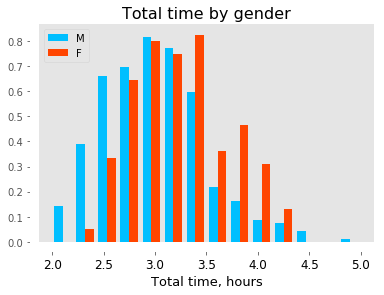

In [6]:
#plt.style.use('seaborn-muted')

x = df['Finish'][df['gender'] == 'M'] / pd.Timedelta(hours=1)
y = df['Finish'][df['gender'] == 'F'] / pd.Timedelta(hours=1)

bins = np.linspace(2, 5, 15)
plt.hist([x, y], bins, label=('M','F'), density=1, color=('deepskyblue', 'orangered'))

plt.xlabel('Total time, hours', fontsize = 13, color = "Black")
#plt.ylabel('Number of finishers', fontsize = 13, color = "Black")
plt.title('Total time by gender', fontsize = 16, color = "Black")
plt.legend(loc=2, fontsize = 10)
sns.despine(offset=9, trim=True)
plt.grid(False)
plt.tick_params(axis='y', which='both', bottom='off', top='off', labelbottom='off')
plt.xticks(fontsize = 12, color = "Black")  

Text(0,0.5,'Total time, hours')

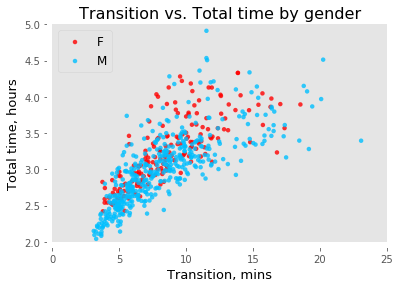

In [7]:
transitionF = df['T total'][df['gender'] == 'F'] / pd.Timedelta(minutes=1)
transitionM = df['T total'][df['gender'] == 'M'] / pd.Timedelta(minutes=1)

totalF =  df['Finish'][df['gender'] == 'F'] / pd.Timedelta(hours=1)
totalM = df['Finish'][df['gender'] == 'M'] / pd.Timedelta(hours=1)

colors = ('red', 'deepskyblue')
groups = ('F', 'M')
datas = (transitionF, transitionM)
totals = (totalF, totalM)

for data, color, total, group in zip(datas, colors, totals, groups):
    plt.scatter(data, total, alpha=0.8, c=color, edgecolors='none', s=20, label=group)
    plt.xlim(0, 25)
    plt.ylim(2, 5)

plt.title('Transition vs. Total time by gender', fontsize = 16, color = "Black")

sns.despine(offset=5, trim=True);
plt.grid(False)
plt.legend(loc=2, fontsize = 12)
plt.xlabel('Transition, mins', fontsize = 13, color = "Black")
plt.ylabel('Total time, hours', fontsize = 13, color = "Black")

(0.2, 2.5)

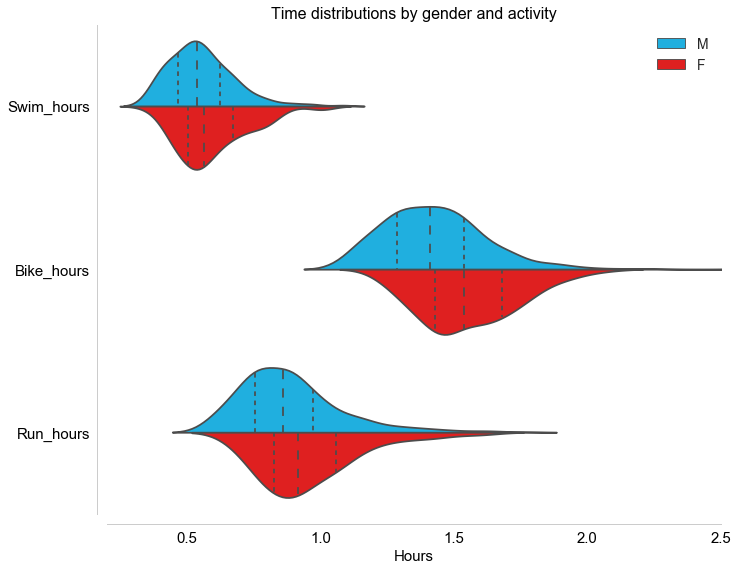

In [11]:
df_long1 = df_long[~df_long['Stage'].isin(["Finish_time_hours", 'Transition_hours'])]
fig = plt.figure(figsize=(11, 9))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x = 'Time', y = 'Stage', data=df_long1, hue="gender", split=True,
               inner="quart", palette={"M": "deepskyblue", "F": "red"})
sns.despine(offset=10, trim=False)
plt.grid(False)

plt.title('Time distributions by gender and activity', fontsize = 16, color = "Black")

plt.xticks(fontsize = 15, color = "Black")  
plt.yticks(fontsize = 15, color = "Black")   
plt.xlabel('Hours', fontsize = 15, color = "Black")
plt.ylabel("")
plt.legend(fontsize = 14)
plt.xlim([0.2,2.5])

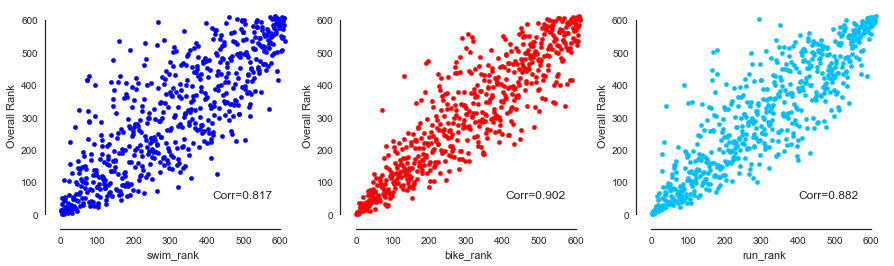

In [22]:
fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=3)

a = np.corrcoef(df['swim_rank'], df['Overall Rank'])
b = np.corrcoef(df['bike_rank'], df['Overall Rank'])
c = np.corrcoef(df['run_rank'], df['Overall Rank'])


df.plot.scatter(x='swim_rank', y='Overall Rank', ax=axes[0], color = "blue", s=20)
plt.grid(False)
plt.text(-1200,50,"Corr=%0.3f" % a[0,1])


df.plot.scatter(x='bike_rank', y='Overall Rank', ax=axes[1], color = "red", s=20)
plt.text(-400,50,"Corr=%0.3f" % b[0,1])

df.plot.scatter(x='run_rank', y='Overall Rank', ax=axes[2], color = "deepskyblue", s=20)
plt.text(400,50,"Corr=%0.3f" % c[0,1])
plt.grid(False)
sns.despine(offset=5, trim=True)


In [46]:
df['Bike_hours_norm'] = df['Bike_hours']/df['Bike_hours'].median()
df['Swim_hours_norm'] = df['Swim_hours']/df['Swim_hours'].median()
df['Run_hours_norm'] = df['Run_hours']/df['Run_hours'].median()
df['Total_norm'] = df['Bike_hours_norm'] + df['Swim_hours_norm'] + df['Run_hours_norm']
df['Total_norm_rank'] = df['Total_norm'].rank(ascending=True)

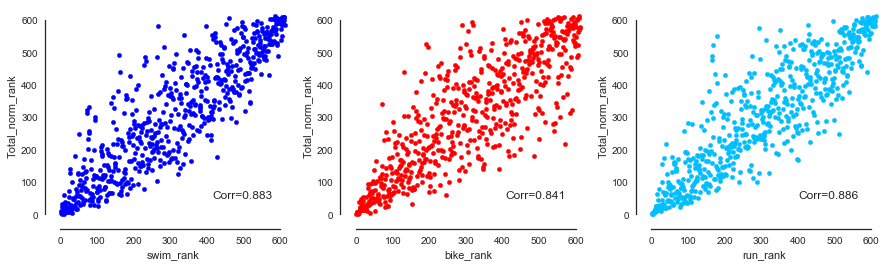

In [38]:
fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=3)

a = np.corrcoef(df['swim_rank'], df['Total_norm_rank'])
b = np.corrcoef(df['bike_rank'], df['Total_norm_rank'])
c = np.corrcoef(df['run_rank'], df['Total_norm_rank'])

 
df.plot.scatter(x='swim_rank', y='Total_norm_rank', ax=axes[0], color = "blue", s=20)
plt.text(-1200,50,"Corr=%0.3f" % a[0,1])


df.plot.scatter(x='bike_rank', y='Total_norm_rank', ax=axes[1], color = "red", s=20)
plt.text(-400,50,"Corr=%0.3f" % b[0,1])



df.plot.scatter(x='run_rank', y='Total_norm_rank', ax=axes[2], color = "deepskyblue", s=20)
plt.text(400,50,"Corr=%0.3f" % c[0,1])

sns.despine(offset=5, trim=True);
plt.grid(False)


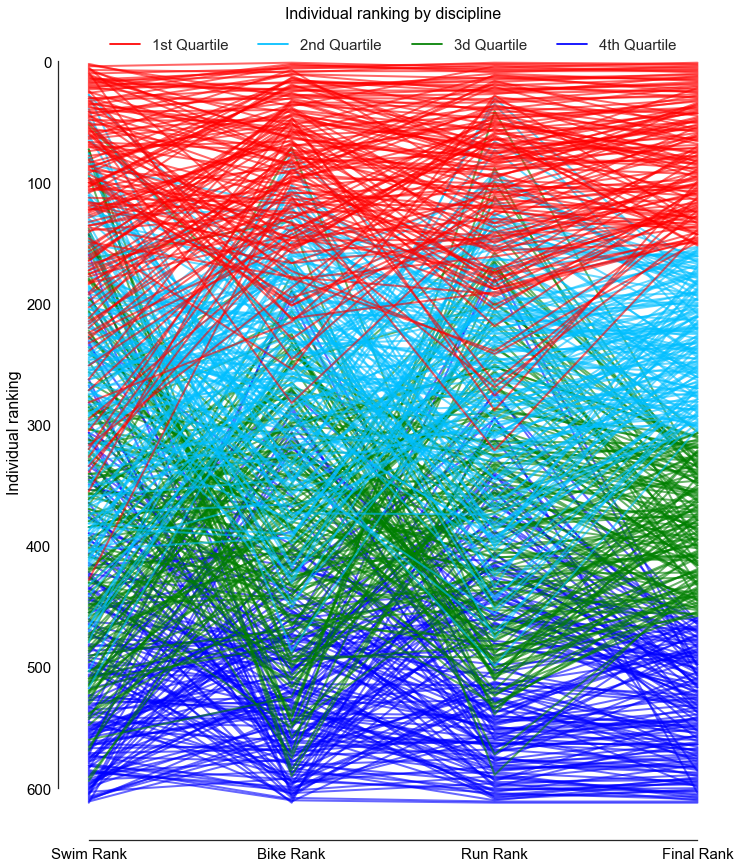

In [47]:
plt.style.use('seaborn-white')
df2 = df[['swim_rank','bike_rank', 'run_rank', 'Overall Rank']]

colors = {'1st': 'red', '2nd': 'deepskyblue', '3d': 'green', '4th': 'blue'}

fig = plt.figure(figsize=(12, 15))



#fig.set_alpha(0)
plt.plot(0, 0, color='red')
plt.plot(0, 0, color='deepskyblue')
plt.plot(0, 0, color='green')
plt.plot(0, 0, color='blue')
for _, line in df2.sort_values('Overall Rank', ascending=False).iterrows():
    if line['Overall Rank']/611*100 <25:
        color = colors['1st']
    elif line['Overall Rank']/611*100 < 50:
        color = colors['2nd']
    elif line['Overall Rank']/611*100 < 75:
        color = colors['3d']
    else:
        color = colors['4th']     
    plt.plot([0, 1, 2, 3], [line['swim_rank'], line['bike_rank'], line['run_rank'], line['Overall Rank']],
             linewidth=2, color = color, alpha=0.6)
    
plt.legend(['1st Quartile','2nd Quartile', '3d Quartile','4th Quartile'], loc = 9, fontsize = 15, ncol = 4)
    
plt.title('Individual ranking by discipline', fontsize = 16, color = "Black")
my_xticks = ['Swim Rank','Bike Rank','Run Rank','Final Rank']
plt.xticks([0, 1, 2, 3], my_xticks, fontsize = 15, color = "Black") 
plt.yticks(fontsize = 15, color = "Black")

plt.ylabel('Individual ranking', fontsize = 16, color = "Black")
sns.despine(trim=True)
plt.grid(False)
plt.gca().invert_yaxis()

In [ ]:
#Appendix




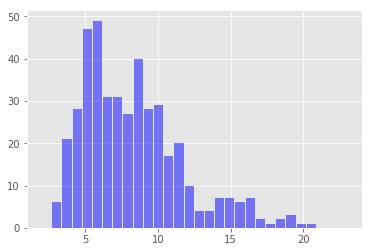

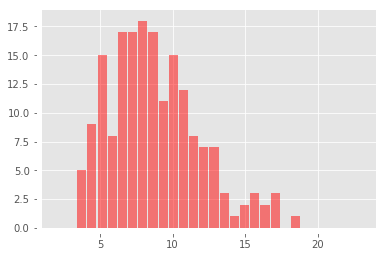

In [8]:
df[df['gender'] == 'M']['Transition_mins'].hist(bins=30, range = (2, 23), facecolor='blue', alpha=0.5, rwidth = 0.9)
plt.figure()
df[df['gender'] == 'F']['Transition_mins'].hist(bins=30, range = (2, 23), facecolor='red', alpha=0.5, rwidth = 0.9)
sns.despine(offset=5);

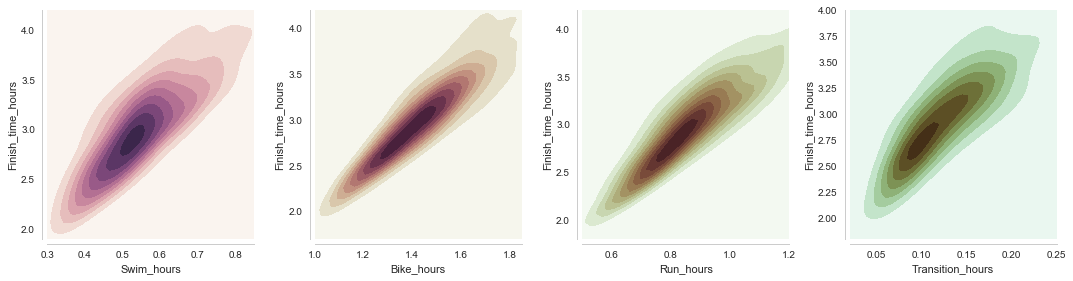

In [9]:
sns.set(style="whitegrid")

f, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=False, sharey=False)
sports = (df['Swim_hours'], df['Bike_hours'], df['Run_hours'], df['Transition_hours'])
lims = (((0.3,0.85), (1.9, 4.2)), ((1, 1.85), (1.7, 4.2)), ((0.5, 1.2), (1.8, 4.2)), ((0.02, 0.25), (1.8, 4)))

#ax = sns.kdeplot(df['Finish_time_hours'], df['Bike_hours'],cmap="Reds", shade=True, shade_lowest=False, dropna=True, )

for ax, s, sport, lim in zip(axes.flat, np.linspace(0, 3, 10), sports, lims):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
   
    sns.kdeplot(sport, df['Finish_time_hours'], cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=lim[0], ylim=lim[1])

f.tight_layout()
sns.despine(offset=5);
# Add labels to the plot
#red = sns.color_palette("Reds")[-2]
#blue = sns.color_palette("Blues")[-2]
#ax.set(xlim=(1, 4.5), ylim=(1, 2))

In [10]:
df['id'] = df.index
df_wide = df[['id', 'Finish_time_hours','Swim_hours', 'Bike_hours', 'Run_hours', 'Transition_hours', 'gender']]
# df_wide.rename(columns={'Finish_time_hours': 'Time_Finish_hours',
#                       'Swim_hours': 'Time_Swim_hours',
#                       'Bike_hours': 'Time_Bike_hours',
#                       'Run_hours': 'Time_Run_hours',
#                       'Transition_hours': 'Time_Transition_hours'}, inplace=True)
# df_long = pd.wide_to_long(df_wide, 'Time', i=['id', 'gender'], j='Stage', sep='_')
df_long = pd.melt(df_wide, id_vars=['id','gender'], var_name='Stage', value_name='Time')
df

,Name,Country,Div Rank,Gender Rank,Overall Rank,Swim,Bike,Run,Finish,Points,...,Bike_hours,Swim_hours,Run_hours,Transition_hours,Finish_time_hours,Transition_mins,swim_rank,bike_rank,run_rank,id
0,"Chase, Nicholas",USA,1.0,1.0,1.0,00:20:19,01:03:20,00:35:29,02:02:25,1000.0,...,1.055556,0.338611,0.591389,0.054722,2.040278,3.283333,4.0,1.0,5.0,0
1,"Hardy, Ryan",USA,2.0,2.0,2.0,00:21:28,01:06:12,00:33:35,02:04:55,947.0,...,1.103333,0.357778,0.559722,0.061111,2.081944,3.666667,10.0,6.0,1.0,1
2,"Dixon, Andrew",USA,3.0,3.0,3.0,00:23:25,01:05:01,00:34:03,02:05:38,932.0,...,1.083611,0.390278,0.567500,0.052500,2.093889,3.150000,33.0,4.0,2.0,2
3,"Vande Casteele, Niels",BEL,4.0,4.0,4.0,00:22:50,01:03:39,00:36:12,02:06:21,917.0,...,1.060833,0.380556,0.603333,0.061111,2.105833,3.666667,22.0,2.0,9.0,3
4,"Antunes, Jose",BRA,1.0,5.0,5.0,00:21:01,01:07:09,00:35:04,02:06:41,1000.0,...,1.119167,0.350278,0.584444,0.057500,2.111389,3.450000,7.0,9.0,3.0,4
5,"Arruda, Joseph",USA,1.0,6.0,6.0,00:22:42,01:06:02,00:35:54,02:08:19,1000.0,...,1.100556,0.378333,0.598333,0.061389,2.138611,3.683333,18.0,5.0,6.0,5
6,"Noon, Jonathan",USA,5.0,7.0,7.0,00:23:07,01:04:19,00:35:58,02:08:28,872.0,...,1.071944,0.385278,0.599444,0.084444,2.141111,5.066667,26.0,3.0,7.0,6
7,"Nocera, Martin",USA,6.0,8.0,8.0,00:22:19,01:06:50,00:36:09,02:08:33,871.0,...,1.113889,0.371944,0.602500,0.054167,2.142500,3.250000,15.0,8.0,8.0,7
8,"Tete, Frederic",PYF,1.0,9.0,9.0,00:20:07,01:10:37,00:35:08,02:08:58,1000.0,...,1.176944,0.335278,0.585556,0.051667,2.149444,3.100000,2.0,37.0,4.0,8
9,"Baughman, Russell",USA,7.0,10.0,10.0,00:22:43,01:08:14,00:36:51,02:11:33,808.0,...,1.137222,0.378611,0.614167,0.062500,2.192500,3.750000,19.0,18.0,17.0,9


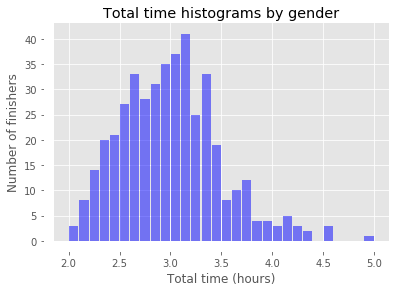

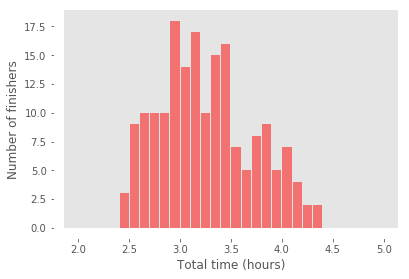

In [4]:
df[df['gender'] == 'M']['Finish_time_hours'].hist(bins=30, range = (2, 5), facecolor='blue', alpha=0.5, rwidth = 0.9)

plt.title('Total time histograms by gender')
plt.xlabel('Total time (hours)')
plt.ylabel('Number of finishers')
sns.despine(offset=10, trim=True);
plt.figure()

df[df['gender'] == 'F']['Finish_time_hours'].hist(bins=30, range = (2, 5), facecolor='red', alpha=0.5, rwidth = 0.9)
plt.xlabel('Total time (hours)')
plt.ylabel('Number of finishers')

sns.despine(offset=10, trim=True)
plt.grid(False)

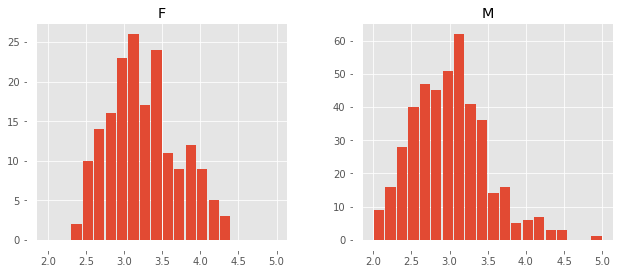

In [5]:

df.hist(column='Finish_time_hours', by='gender', bins=20, range = (2, 5), rwidth = 0.9, figsize = (10,4))

sns.despine(offset=10, trim=True)


/usr/local/lib/python3.6/site-packages/matplotlib/colorbar.py:217: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


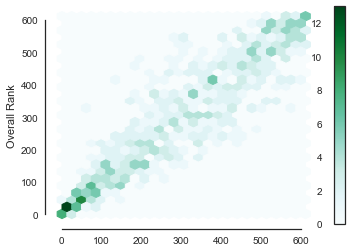

In [19]:
df.plot.hexbin(x='bike_rank', y='Overall Rank', gridsize=25)
sns.despine(offset=5, trim=True)

/usr/local/lib/python3.6/site-packages/matplotlib/colorbar.py:217: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


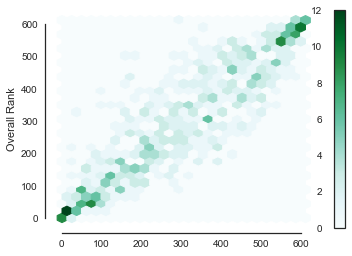

In [20]:
df.plot.hexbin(x='run_rank', y='Overall Rank', gridsize=25)
sns.despine(offset=5, trim=True)

/usr/local/lib/python3.6/site-packages/matplotlib/colorbar.py:217: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


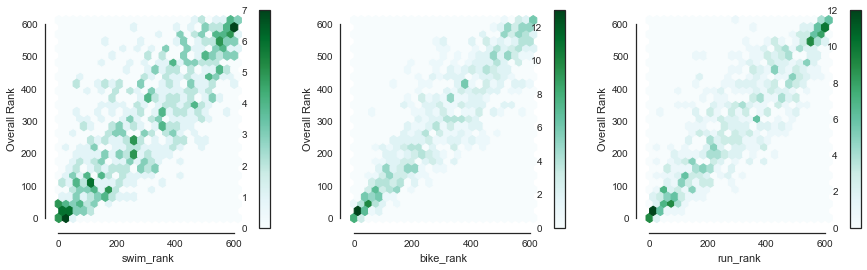

In [21]:
#f, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=False, sharey=False)

#sports = (df['swim_rank'], df['bike_rank'], df['run_rank'])
fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=3)

df.plot.hexbin(x='swim_rank', y='Overall Rank', gridsize=25, ax=axes[0])
df.plot.hexbin(x='bike_rank', y='Overall Rank', gridsize=25, ax=axes[1])
df.plot.hexbin(x='run_rank', y='Overall Rank', gridsize=25, ax=axes[2])


sns.despine(offset=5, trim=True)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


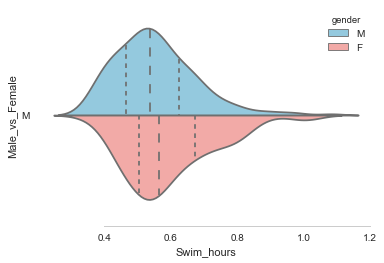

In [12]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
df1 = df[['Finish_time_hours','Swim_hours', 'Bike_hours', 'Run_hours', 'Transition_hours','gender']]
df1['Male_vs_Female'] = 'M'

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x = 'Swim_hours', y = 'Male_vs_Female', data=df1, hue="gender", split=True,
               inner="quart", palette={"M": "skyblue", "F": "r"})

sns.despine(offset=2, trim=True)
plt.grid(False)

#plt.ylim([0.2,1.2])

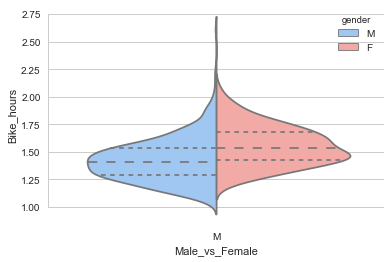

In [13]:
sns.violinplot(y = 'Bike_hours', x = 'Male_vs_Female', data=df1, hue="gender", split=True,
               inner="quart", palette={"M": "b", "F": "r"})
sns.despine(offset=1, trim=True);

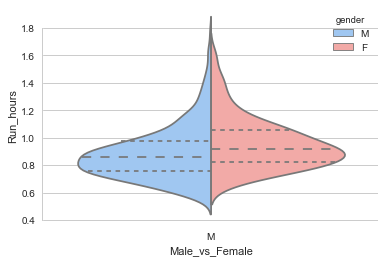

In [14]:
sns.violinplot(y = 'Run_hours', x = 'Male_vs_Female', data=df1, hue="gender", split=True,
               inner="quart", palette={"M": "b", "F": "r"})
sns.despine(offset=1, trim=True);

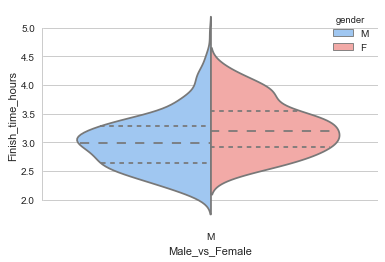

In [15]:
sns.violinplot(y = 'Finish_time_hours', x = 'Male_vs_Female', data=df1, hue="gender", split=True,
               inner="quart", palette={"M": "b", "F": "r"})
sns.despine(offset=1, trim=True);

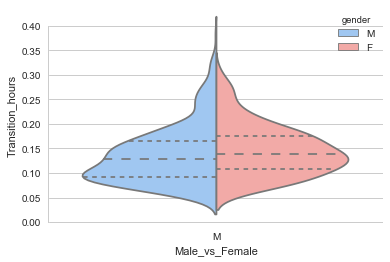

In [16]:
sns.violinplot(y = 'Transition_hours', x = 'Male_vs_Female', data=df1, hue="gender", split=True,
               inner="quart", palette={"M": "b", "F": "r"})

sns.despine(offset=1, trim=True)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


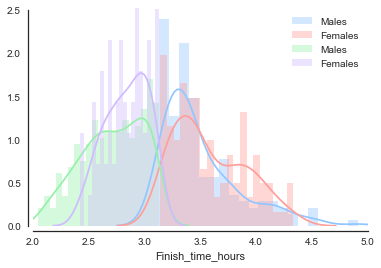

In [17]:
plt.style.use('seaborn-white')
sns.distplot(df['Finish_time_hours'][df['Overall Rank'] > 350] [df['gender'] == 'M'], bins = 20)
sns.distplot(df['Finish_time_hours'][df['Overall Rank'] > 350][df['gender'] == 'F'],bins = 20, color = 'r')
sns.distplot(df['Finish_time_hours'][df['Overall Rank'] <= 350] [df['gender'] == 'M'], bins = 20)
sns.distplot(df['Finish_time_hours'][df['Overall Rank'] <= 350][df['gender'] == 'F'],bins = 20, color = 'm')
plt.legend(['Males','Females', 'Males','Females'])
plt.xlim([2,5])

sns.despine(offset=5, trim=True)

/usr/local/lib/python3.6/site-packages/matplotlib/colorbar.py:217: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


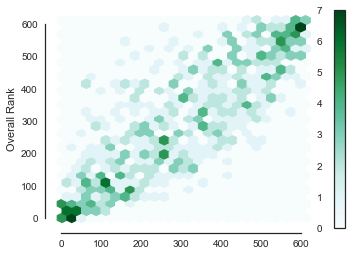

In [18]:
df.plot.hexbin(x='swim_rank', y='Overall Rank', gridsize=25)
sns.despine(offset=5, trim=True)

In [31]:
df['Finish_time_minutes'] = df['Finish'] / pd.Timedelta(minutes=1)
l = df['Finish_time_minutes'][df['gender'] == 'F']

l.mean()

195.39244935543277

In [32]:
df['Swim_time_minutes'] = df['Swim'] / pd.Timedelta(minutes=1)
l = df['Swim_time_minutes'][df['gender'] == 'F']
k = df['Swim_time_minutes'][df['gender'] == 'M']
l.mean()


35.78913443830571

In [33]:
k.mean()

33.202209302325585

In [34]:
df['Bike_time_minutes'] = df['Bike'] / pd.Timedelta(minutes=1)
l = df['Bike_time_minutes'][df['gender'] == 'F']
k = df['Bike_time_minutes'][df['gender'] == 'M']
l.mean()

93.34060773480662

In [35]:
k.mean()

85.66604651162791

In [36]:
df['Run_time_minutes'] = df['Run'] / pd.Timedelta(minutes=1)
l = df['Run_time_minutes'][df['gender'] == 'F']
k = df['Run_time_minutes'][df['gender'] == 'M']
l.mean()

57.48710865561695